# 영어/한국어 Word2Vec 실습

## 1. 영어 Word2Vec 만들기

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hoon9\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [4]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

In [5]:
# 훈련 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x1fb7cc55be0>)

- 훈련 데이터 파일에서 <content>와 </content> 사이의 내용을 얻는다.
- 내용 중에는 (Laughter)나 (Applause)와 같은 배경음을 나타내는 단어도 제거해야한다.

### 1) 훈련 데이터 전처리하기

In [8]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

In [12]:
# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# (Audio), (Laughter) 등의 배경음 부분을 제거
# 해당 코드는 괄호로 구성된 내용을 제거
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환
normalized_text = []
for string in sent_text:
    tokens = re.sub(r'[^a-z0-9]+', " ", string.lower())
    normalized_text.append(tokens)
    
# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행
result = [word_tokenize(sentence) for sentence in normalized_text]

In [13]:
print(f'총 샘플의 개수 : {len(result)}')

총 샘플의 개수 : 273424


- re.sub 학습
    - ^ : 문자열의 시작과 일치하는지, 맨 앞에 위치할 경우 해당 문자 패턴이 아닌 것과 매칭
    - \* : 0회 이상 반복일치

In [21]:
test_1 = 'abdekd kd(Laughter)dkdkdee2.\n'
test_2 = 'I am happy because I am learning AI!(Applause)'
merged_text = test_1 + test_2

# 1
parsed_text = re.sub(r'\([^)]*\)', '', merged_text)
print("#1: \n", parsed_text, "\n")

# 2
normTest = []
for data in parsed_text:
    tokens = re.sub(r'[^a-z0-9]+', " ", data.lower())
    normTest.append(tokens)

print("#2: \n", normTest, "\n")

#1: 
 abdekd kddkdkdee2.
I am happy because I am learning AI! 

#2: 
 ['a', 'b', 'd', 'e', 'k', 'd', ' ', 'k', 'd', 'd', 'k', 'd', 'k', 'd', 'e', 'e', '2', ' ', ' ', 'i', ' ', 'a', 'm', ' ', 'h', 'a', 'p', 'p', 'y', ' ', 'b', 'e', 'c', 'a', 'u', 's', 'e', ' ', 'i', ' ', 'a', 'm', ' ', 'l', 'e', 'a', 'r', 'n', 'i', 'n', 'g', ' ', 'a', 'i', ' '] 



In [22]:
#샘플 3개만 출력
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


### 3) Word2Vec 훈련시키기

In [28]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

- size 혹은 vector_size : 워드 벡터의 특징 값. 즉, 임베딩된 벡터의 차원
- window : 컨텍스트 윈도우 크기
- min_count : 단어 최소 빈도 수 제한 (빈도수가 적은 단어들은 학습하지 않는다)
- workers : 학습을 위한 프로세스 수
- sg : 0은 CBOW, 1은 Skip-gram

In [30]:
# 'man'과 가장 유사한 단어들을 출력
model_result = model.wv.most_similar('man')
print(model_result)

[('woman', 0.8353338241577148), ('guy', 0.8126121163368225), ('lady', 0.7747376561164856), ('boy', 0.7561632990837097), ('girl', 0.7363364100456238), ('soldier', 0.7147216796875), ('gentleman', 0.6918452978134155), ('poet', 0.6588586568832397), ('david', 0.6557528972625732), ('kid', 0.6516529321670532)]


### 4) Word2Vec 모델 저장하고 로드하기

In [31]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [32]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8353338241577148), ('guy', 0.8126121163368225), ('lady', 0.7747376561164856), ('boy', 0.7561632990837097), ('girl', 0.7363364100456238), ('soldier', 0.7147216796875), ('gentleman', 0.6918452978134155), ('poet', 0.6588586568832397), ('david', 0.6557528972625732), ('kid', 0.6516529321670532)]


##  2. 한국어 Word2Vec 만들기(네이버 영화 리뷰)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x254a3a71be0>)

In [2]:
train_data = pd.read_table('ratings.txt')
print(len(train_data))

200000


In [3]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [4]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


In [5]:
# NULL 값이 존재하는 행 제거
train_data = train_data.dropna(how = 'any')
print(train_data.isnull().values.any())
print(len(train_data))

False
199992


In [6]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘',
             '걍','과','도','를','으로','자','에','와','한','하다']

In [7]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    # 토큰화
    temp_X = okt.morphs(sentence, stem=True) 
    
    #불용어 제거
    temp_X = [word for word in temp_X if not word in stopwords]
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 95
리뷰의 평균 길이 : 12.338453538141525


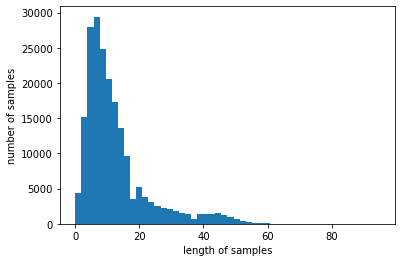

In [8]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [10]:
# Word Embedding

from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, vector_size = 100, 
                 window = 5, min_count = 5, workers = 4, sg = 0)

In [11]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(17615, 100)

In [12]:
# '최민식' 이라는 단어와 비슷한 것들
print(model.wv.most_similar("최민식"))

[('한석규', 0.8584694862365723), ('박중훈', 0.8418727517127991), ('설경구', 0.8324524760246277), ('송강호', 0.8239122033119202), ('안성기', 0.822340726852417), ('박신양', 0.8194589614868164), ('엄정화', 0.815128743648529), ('김명민', 0.8148878216743469), ('맷', 0.8108566403388977), ('전도연', 0.8101314902305603)]


In [13]:
print(model.wv.most_similar("히어로"))

[('호러', 0.8415629267692566), ('슬래셔', 0.839734673500061), ('느와르', 0.8338644504547119), ('무협', 0.8279883861541748), ('물', 0.813388466835022), ('sf', 0.8084235191345215), ('블록버스터', 0.7876394987106323), ('무비', 0.7873978018760681), ('SF', 0.7844432592391968), ('물의', 0.7825545072555542)]
